# Chapter 3: Sampling the Imaginary - Samples

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az

### Code 3.1

In [4]:
pr_positive_vampire = 0.95
pr_positive_mortal = 0.01
pr_vampire = 0.001
pr_positive = pr_positive_vampire * pr_vampire + pr_positive_mortal * (1 - pr_vampire)
pr_vampire_positive = pr_positive_vampire * pr_vampire / pr_positive
print(pr_vampire_positive)

0.08683729433272395


### Code 3.2

In [5]:
GRID_SIZE = 1000

p_grid = np.linspace(0,1,GRID_SIZE)
prob_p = np.repeat(1,GRID_SIZE)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / posterior.sum()

### Code 3.3

In [6]:
samples = np.random.choice(p_grid, p=posterior, size=GRID_SIZE, replace=True)

### Code 3.4

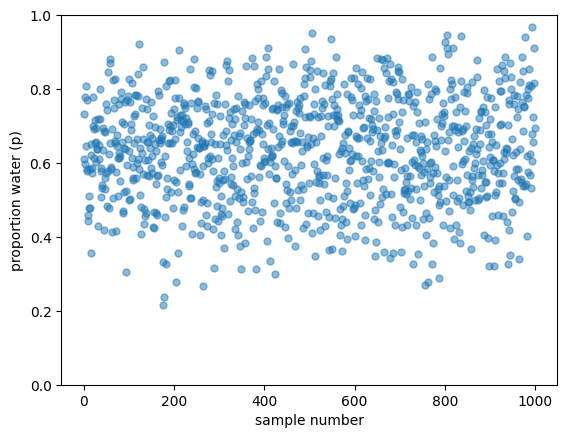

In [7]:
plt.plot(samples, '.', alpha=0.5, markersize=10)
plt.xlabel('sample number')
plt.ylabel('proportion water (p)')
plt.ylim((0,1));

### Code 3.5

Text(0, 0.5, 'Density')

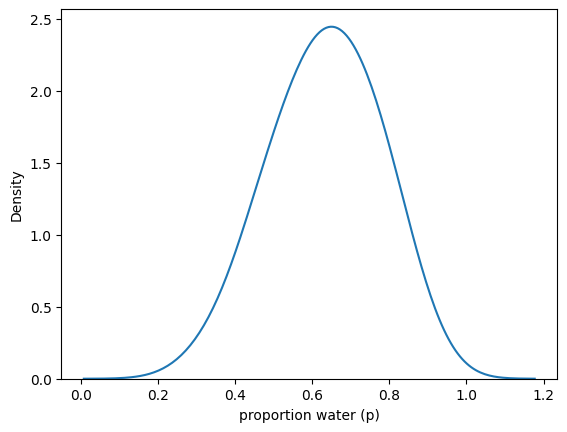

In [8]:
sns.kdeplot(samples, bw_method=0.5)
plt.xlabel('proportion water (p)')
plt.ylabel('Density')

### Code 3.6

In [9]:
sum(posterior[p_grid < 0.5])

0.17187458902022879

### Code 3.7

In [10]:
sum(samples < 0.5) / GRID_SIZE

0.179

### Code 3.8

In [11]:
sum((samples > 0.5) & (samples < 0.75)) / GRID_SIZE

0.595

### Code 3.9

In [12]:
np.quantile(samples, 0.8)

0.760960960960961

### Code 3.10

In [13]:
np.quantile(samples, [0.1, 0.9])

array([0.44834835, 0.81381381])

### Code 3.11

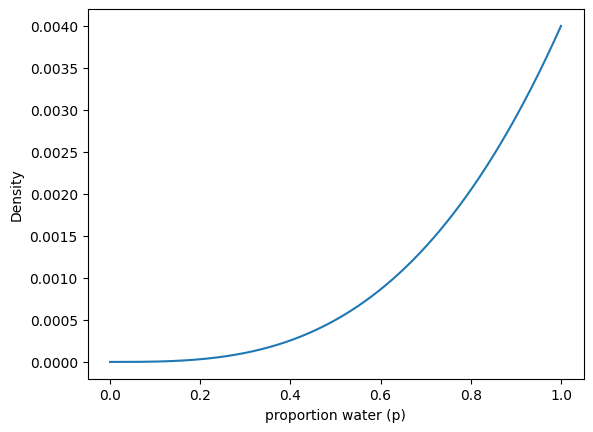

In [14]:
p_grid = np.linspace(0, 1, GRID_SIZE)
prior = np.repeat(1, GRID_SIZE)
likelihood = stats.binom.pmf(k=3, n=3, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()
samples = np.random.choice(p_grid, size=GRID_SIZE, replace=True, p=posterior)

plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

### Code 3.12

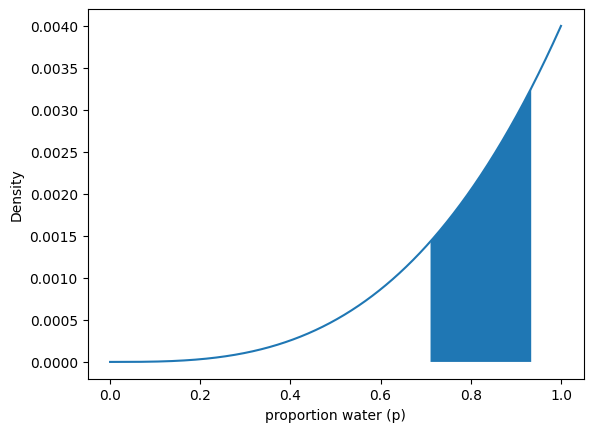

In [30]:
q1, q3 = np.percentile(samples, [25, 75])
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density")
plt.fill_between(p_grid, posterior, where=(p_grid > q1) & (p_grid < q3));

### Code 3.13

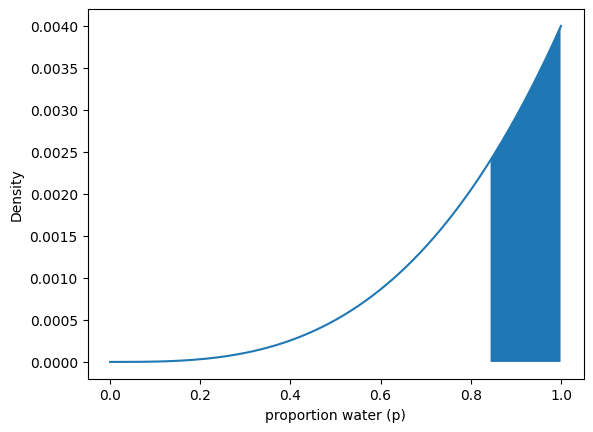

In [31]:
start, end = az.hdi(samples, hdi_prob=0.5)
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density")
plt.fill_between(p_grid, posterior, where=(p_grid > start) & (p_grid < end));

### Code 3.14

In [35]:
p_grid[posterior.argmax()]

1.0

### Code 3.15

In [47]:
stats.mode(samples, keepdims=False)[0]

0.9629629629629629

### Code 3.16

In [51]:
print('Mean: ', samples.mean())
print('Median: ', np.median(samples))

Mean:  0.8037697697697698
Median:  0.8428428428428428


### Code 3.17

In [52]:
sum(posterior * abs(0.5 - p_grid))

0.3128751874998122

### Code 3.18

In [54]:
loss = np.array([sum(posterior * abs(p - p_grid)) for p in p_grid])

### Code 3.19

In [56]:
p_grid[loss.argmin()]

0.8408408408408409

### Code 3.20

In [57]:
stats.binom.pmf(k=[0,1,2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

### Code 3.21

In [70]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([1])

### Code 3.22

In [77]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([1, 2, 0, 2, 2, 2, 0, 2, 0, 2])

### Code 3.23

In [81]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=100_000)
np.unique(dummy_w, return_counts=True)

(array([0, 1, 2]), array([ 8981, 42132, 48887]))

### Code 3.24

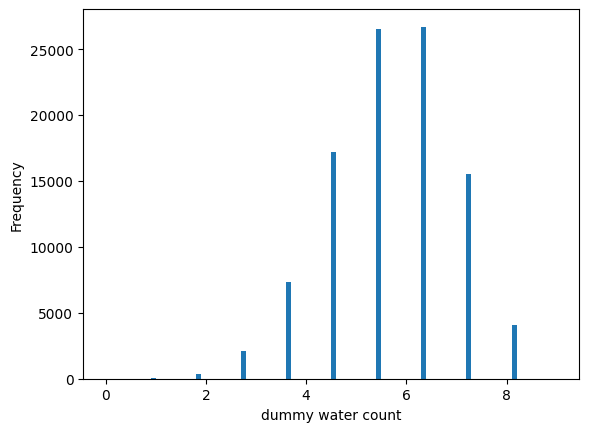

In [86]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=100_000)
plt.hist(dummy_w, width=0.1)
plt.xlabel('dummy water count')
plt.ylabel('Frequency')
plt.show();

### Code 3.25

In [89]:
w = stats.binom.rvs(n=9, p=0.6, size=1000)

### Code 3.26

In [90]:
w = stats.binom.rvs(n=9, p=samples, size=1000)